## Praca domowa 4

#### Autor: Mikołaj Piórczyński

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [2]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

In [3]:
df.loc[(df.Year > 2015) & (df.Publisher == "Nintendo") & (df.NA_Sales < df.EU_Sales)].reset_index(drop=True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [4]:
df.loc[df.Year == 2015].groupby('Genre').Global_Sales.sum().idxmax()

'Action'

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [5]:
df_agg = df.groupby('Genre').agg({"EU_Sales" : "mean", "JP_Sales" : "mean"})
df_agg.loc[df_agg.JP_Sales > df_agg.EU_Sales].\
       drop('EU_Sales', axis=1).\
       reset_index().\
       sort_values(by='JP_Sales', ascending=False).\
       rename(columns={'Genre' : 'Typ Gry', 'JP_Sales': 'Średnia sprzedaż w Japonii'}).\
       reset_index(drop=True)

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

### 1) Oryginalny wykres

<img src="https://i.redd.it/svuuk9t5dsw71.png" alt="drawing" width="500"/>

Źródło: https://www.reddit.com/r/dataisbeautiful/comments/qjpbb3/followers_of_the_top_3_business_intelligence

### 2) Wykres w `ggplot2`

<img src="ggplot.png" alt="drawing" width="700"/>

Link: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/PiorczynskiMikolaj/HW2.pdf

### 3) Poprawiony wykres w `Pythonie`

In [6]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [7]:
data = pd.read_csv('data.csv')
data

,tool,media,followers
0,Tableau,LinkedIn,681
1,Tableau,Facebook,345
2,Tableau,Twitter,162
3,Tableau,YouTube,85
4,Power BI,LinkedIn,73
5,Power BI,Facebook,98
6,Power BI,Twitter,137
7,Power BI,YouTube,284
8,Qlik,LinkedIn,187
9,Qlik,Facebook,58


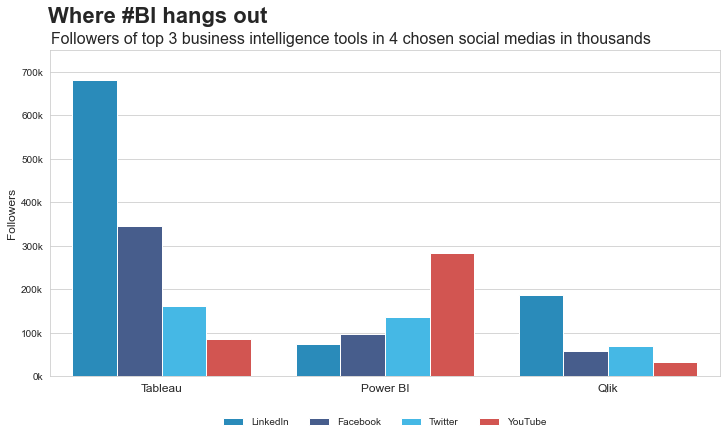

In [8]:
colors = ["#1293d2", "#3b5998", "#2bc4ff", "#e8413b"]
sns.set_palette(sns.color_palette(colors))
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=data, x="tool", y="followers", hue="media", hue_order=data.media.unique())
plt.suptitle("Where #BI hangs out", fontsize=22, x=0.25, fontweight='bold')
ax.set_title("Followers of top 3 business intelligence tools in 4 chosen social medias in thousands", fontsize=16, x=0.45)
ax.set_xlabel("")
ax.set_xticklabels(data.tool.unique(), fontsize=12)
ax.set_ylabel("Followers", fontsize=12)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%dk'))
ax.tick_params(axis='y', labelsize=10)
ax.set_ylim(0, 750)
ax.set_axisbelow(True)
ax.legend(title = "", bbox_to_anchor=(0.5,-0.1), loc="upper center", ncol=4, frameon=False)

plt.show()

### 4) Uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych

Różnice pomiędzy wykresem oryginalnym a wykresem w `ggplot2` zostały omówione już wcześniej w [pracy domowej nr 2](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/PiorczynskiMikolaj/HW2.pdf). W porównaniu do poprzedniej wersji wykresu zostały wprowadzone następujące poprawki:
* usunięto pionowe linie siatki w żaden sposób nie ułatwiające odczywtywanie wartości z wykresu, natomiast pozostawiono tylko linie poziome
* usunięto dokładne wartości umieszczone nad słupkami nie wprowadzające, żadnych nowych danych na wykresie
* zwiekszono rozmieszczenie wartości na osi Y, w celu ułatwiewnia odczytywania wartości
* poprawiono literówkę w podtytule

Podsumowując, różnice pomiędzy wykresem wykonanym w `ggplot2` a w `Pythonie` są natury estetycznej, nie wprowadzają żadnych poważnych zmian, jednak pozwalają na jeszcze większą czytelność wykresu.